#Необходимые вещи из прошлых ноутбуков

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
np.random.seed(1)

In [ ]:
class SimpleLinearLayer:
    def __init__(self, input_size, output_size):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = np.random.random_sample((output_size, input_size)) * 2 - 1
        self.b = np.random.random_sample((output_size,)) * 2 - 1
            
        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
    def forward(self, x):
        h = self.W @ x + self.b 
        return h
    
    def backward(self, delta_next, w_next):
        return w_next.T @ delta_next

    def backward_as_last_layer(self, loss_der):
        return loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))

In [ ]:
import tqdm


class SimpleNN:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        for i in range(1, len(structure)):
            self.layers.append(SimpleLinearLayer(structure[i-1], structure[i]))
        
    def apply(self, x):
        h_array = [x]
        for layer in self.layers:
            h = layer.forward(h_array[-1])
            h_array.append(h)
        return h_array[-1]
    
    def forward(self, x):
        h_array = [x]
        for layer in self.layers:
            h = layer.forward(h_array[-1])
            h_array.append(h)      
        return h_array
    
    def clear_grad_values(self):
        for layer in self.layers:
            layer.clear_grad()
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        cnt = 0
        m = len(y)
        avg_cost_func = []     
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                
                # one sample per time
                h = self.forward(X[i, :])             

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        loss_deriv = self.loss_derivative(h[-1], y[i,:])
                        avg_cost += self.loss(h[-1], y[i,:])
                        grads[layer_num] = layer.backward_as_last_layer(loss_deriv)
                    else:
                        grads[layer_num] = layer.backward(grads[layer_num+1], self.layers[layer_num+1].W)
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            # update weights
            for layer in self.layers:
                layer.W -= alpha * (layer.grad_W / m)
                layer.b -= alpha * (layer.grad_b / m)
                
            # complete the average cost calculation
            avg_cost = 1.0 / m * avg_cost
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

In [ ]:
def MSE_loss(x, y):
    return ((x-y) ** 2).mean()

def MSE_loss_derivative(x, y):
    return 2 * (x - y)

#Начало нового материала

Формируем выборку XOR:

In [ ]:
xor_x = np.random.rand(1000,2) * 2 - 1
print(xor_x)

[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 ...
 [ 0.59297773 -0.10498372]
 [-0.63174489  0.6574657 ]
 [-0.93800408  0.89345654]]


In [ ]:
xor_targets = [np.sign(x[0] * x[1]) for x in xor_x]
print(xor_targets)

[-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

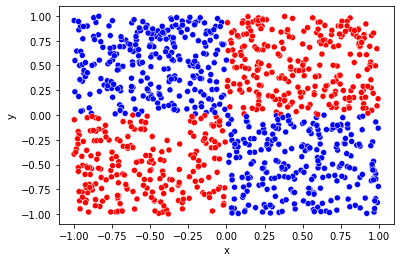

In [ ]:
import pandas as pd

df = pd.DataFrame(xor_x, columns=["x", "y"])

df["val"] = pd.Series(xor_targets).apply(lambda x: "red" if x==1 else "blue")

sns.scatterplot("x", "y", data=df, c=df["val"]).plot()

In [ ]:
xor_targets_for_net = np.array([[0, 1] if np.sign(x[0] * x[1]) > 0 else [1, 0] for x in xor_x])

Задаем метрику и обучаем модель:

In [ ]:
def estimate_accuracy(x, y):
    result = 0
    for i in range(len(x)):
        if np.argmax(x[i]) == np.argmax(y[i]):
            result += 1
    print("accuracy is {}".format(result/len(x) * 100))

  0%|          | 2/500 [00:00<00:26, 18.81it/s]

[-1.37279156 -0.46207002]


100%|██████████| 500/500 [00:25<00:00, 19.88it/s]


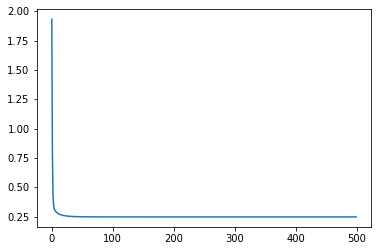

In [ ]:
N = SimpleNN([2,4,2], MSE_loss, MSE_loss_derivative)

print(N.apply([1, 1]))

avg_cost_func = N.train(xor_x, xor_targets_for_net)


sns.lineplot(data=avg_cost_func)
# get the prediction accuracy and print


In [ ]:
predictions = [N.apply(x) for x in xor_x]
estimate_accuracy(xor_targets_for_net, predictions)

accuracy is 42.9


Попробуем обучить модель на метрике BCE:

In [ ]:
def BCE_loss(y, target_labels):
    eps = 1e-12
    target_label = np.argmax(target_labels)
    return -(target_label * np.log(y + eps) + (1-target_label) * np.log(1 - y + eps)).sum()

def BCE_loss_derivative(y, target_labels):
    target_label = np.argmax(target_labels)
    return (y - target_label)/(y * (1-y))


  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
100%|██████████| 500/500 [00:33<00:00, 14.81it/s]


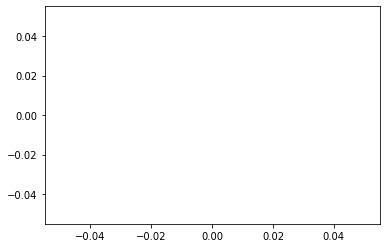

In [ ]:
N_bce = SimpleNN([2,4,1], BCE_loss, BCE_loss_derivative)

avg_cost_func = N_bce.train(xor_x, xor_targets_for_net, 500, 0.01)

sns.lineplot(data=avg_cost_func)



In [ ]:
predictions_bce = [N_bce.apply(x) for x in xor_x]
estimate_accuracy(xor_targets_for_net, predictions_bce)

accuracy is 51.5
